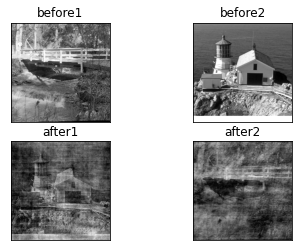

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import cmath

img1 = cv2.imread('BRIDGE.bmp',0)
img2 = cv2.imread('Lighthouse.bmp',0)

dft1 = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)
dft2 = cv2.dft(np.float32(img2),flags = cv2.DFT_COMPLEX_OUTPUT)

h, w = img1.shape

for i in range(h):
  for j in range(w):
    
    #複素数型で取得
    c1 = complex(dft1[i][j][0], dft1[i][j][1])
    c2 = complex(dft2[i][j][0], dft2[i][j][1])
    
   #絶対値取得後、曲座標変換
    magnitude1 = abs(c1)
    phase1 = cmath.phase(c1)
    magnitude2 = abs(c2)
    phase2 = cmath.phase(c2)
    
    #絶対値＊三角関数（位相の入れ替え）
    Re1 = magnitude1 * np.cos(phase2)
    Im1 = magnitude1 * np.sin(phase2)
    Re2 = magnitude2 * np.cos(phase1)
    Im2 = magnitude2 * np.sin(phase1)

    dft1[i][j][0] = Re1
    dft1[i][j][1] = Im1
    dft2[i][j][0] = Re2
    dft2[i][j][1] = Im2

idft1 = cv2.idft(dft1)
idft1 = cv2.magnitude(idft1[:,:,0],idft1[:,:,1])
idft2 = cv2.idft(dft2)
idft2 = cv2.magnitude(idft2[:,:,0],idft2[:,:,1])

plt.subplot(221),plt.imshow(img1, cmap = 'gray')
plt.title('before1'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img2, cmap = 'gray')
plt.title('before2'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(idft1, cmap = 'gray')
plt.title('after1'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(idft2, cmap = 'gray')
plt.title('after2'), plt.xticks([]), plt.yticks([])
plt.show()